In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('data (3).csv')

In [7]:
data.describe()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,10499.500000,48.682905,52.911429,48.070333,25.592612,71.253559,6.455337,100.152823
std,6062.322162,37.474968,33.322077,51.764883,5.089446,22.595578,0.780821,53.867008
min,0.000000,0.000000,5.000000,5.000000,8.836401,14.258814,3.506206,20.227527
25%,5249.750000,19.000000,26.000000,20.000000,22.309683,59.980118,5.954624,63.943544
50%,10499.500000,35.000000,51.000000,30.000000,25.635689,80.577851,6.409945,92.826144
75%,15749.250000,84.000000,68.000000,49.000000,28.599429,90.267451,6.885046,117.156507
max,20999.000000,139.000000,144.000000,204.000000,43.620731,99.963299,9.927343,298.292641


In [8]:
data['label'].value_counts()

cotton         1285
maize          1077
rice           1059
watermelon     1047
grapes         1037
mothbeans      1030
mungbean       1016
pigeonpeas     1010
muskmelon      1008
kidneybeans    1007
orange          993
blackgram       993
pomegranate     990
apple           982
papaya          976
coffee          961
mango           956
lentil          951
banana          931
coconut         860
chickpea        831
Name: label, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   21000 non-null  int64  
 1   N            21000 non-null  int64  
 2   P            21000 non-null  int64  
 3   K            21000 non-null  int64  
 4   temperature  21000 non-null  float64
 5   humidity     21000 non-null  float64
 6   ph           21000 non-null  float64
 7   rainfall     21000 non-null  float64
 8   state        21000 non-null  object 
 9   label        21000 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [10]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'state',
       'label'],
      dtype='object')

In [11]:
states = data['state']
data.drop(columns=['state'],inplace=True)

<Figure size 2000x2000 with 0 Axes>

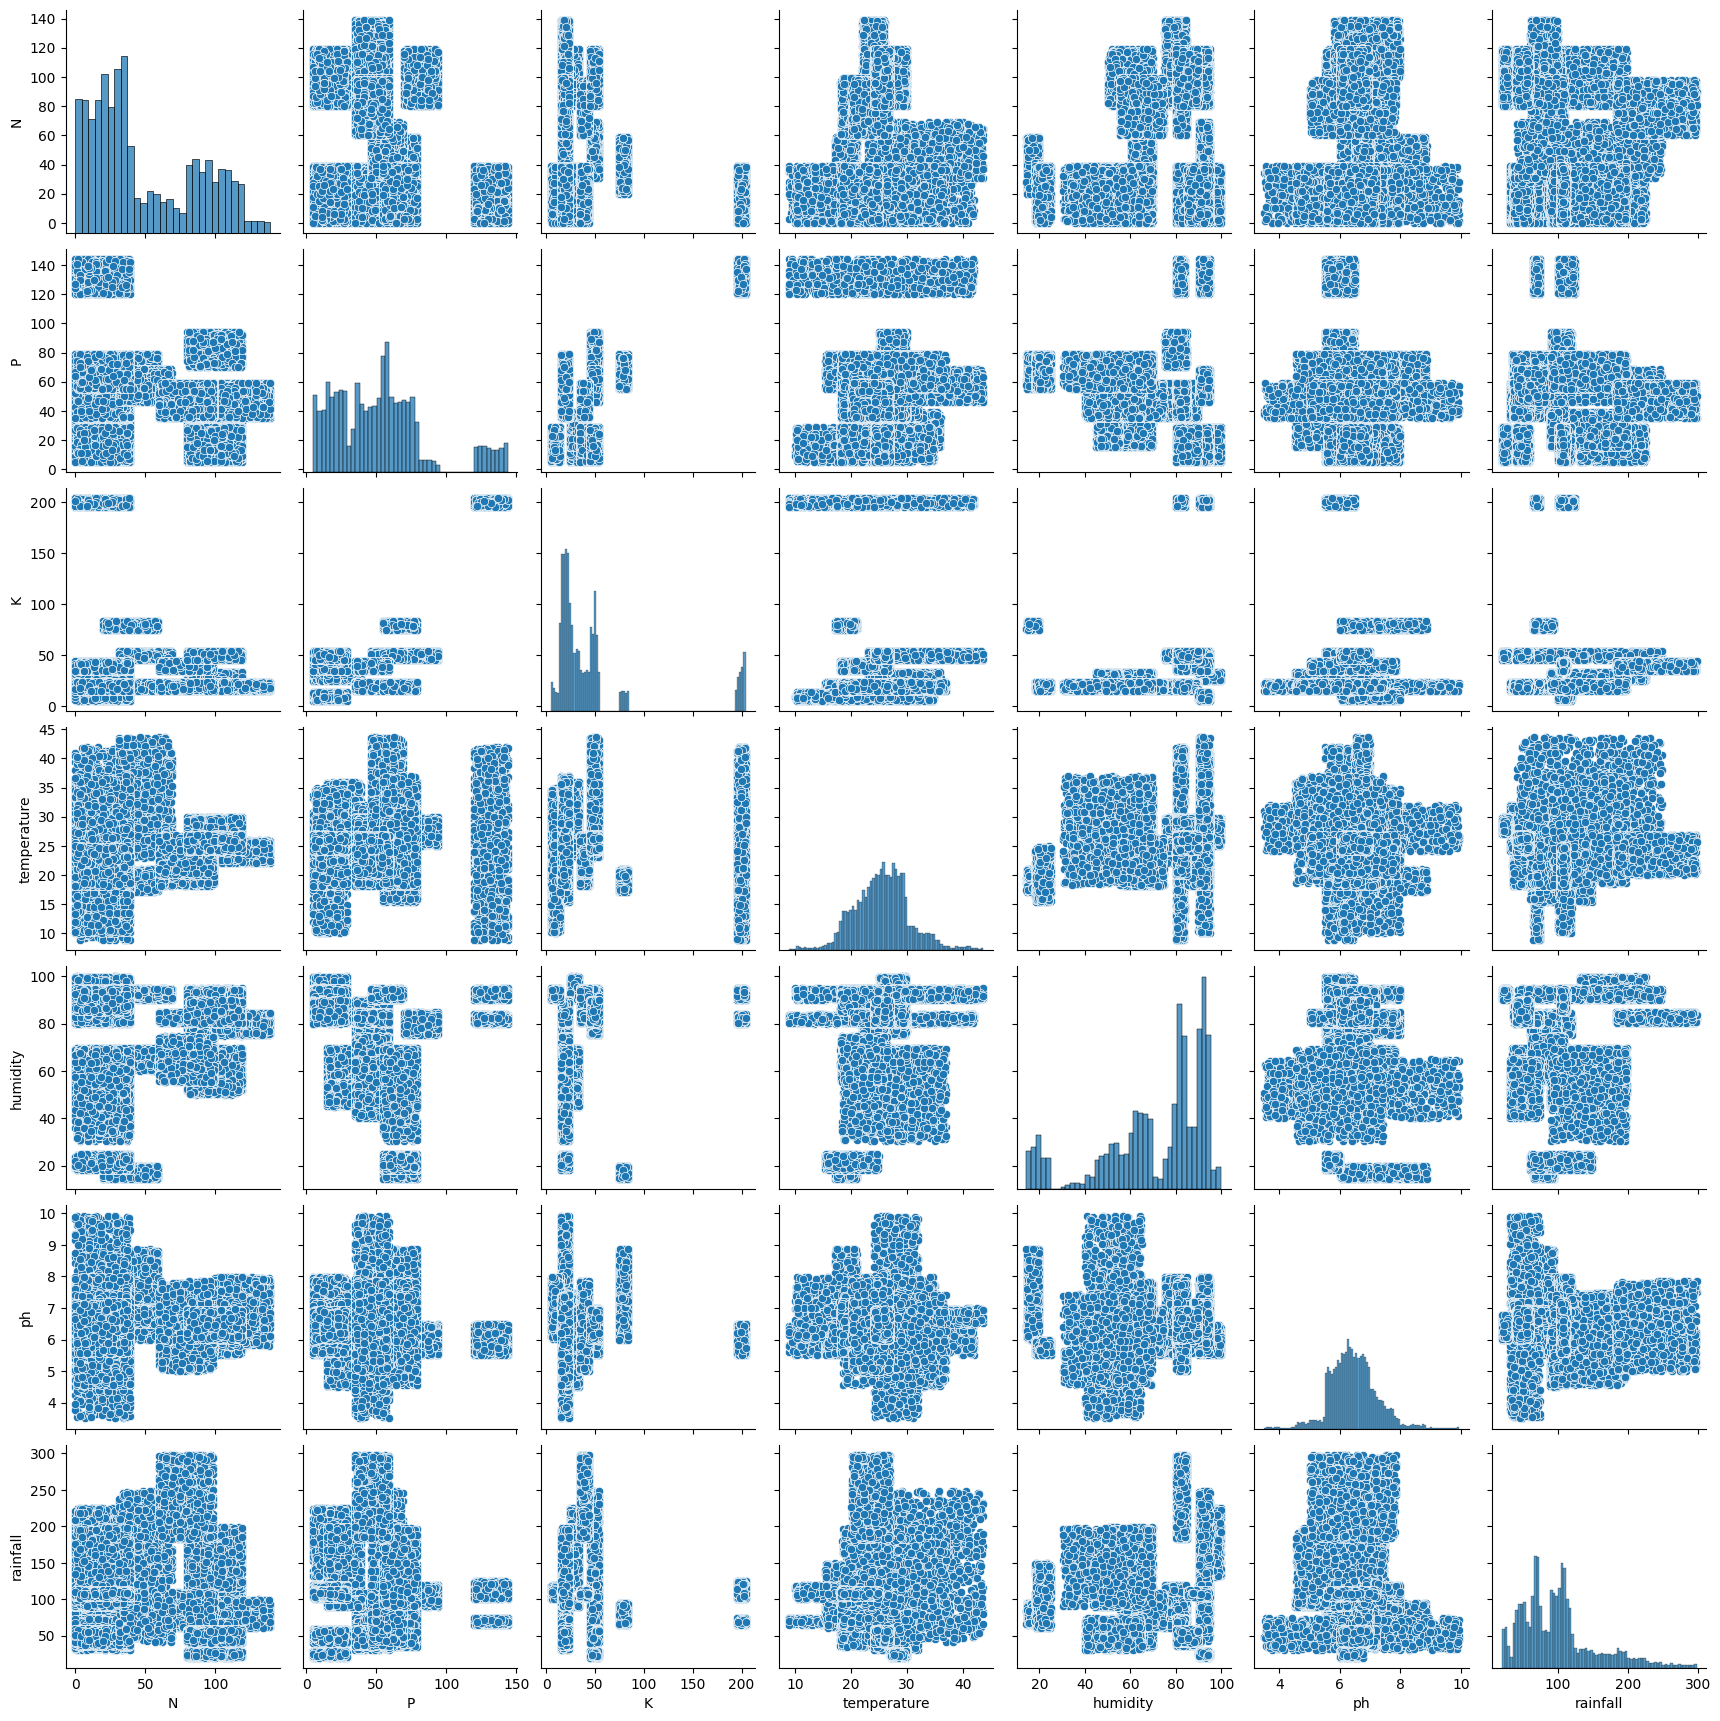

In [12]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

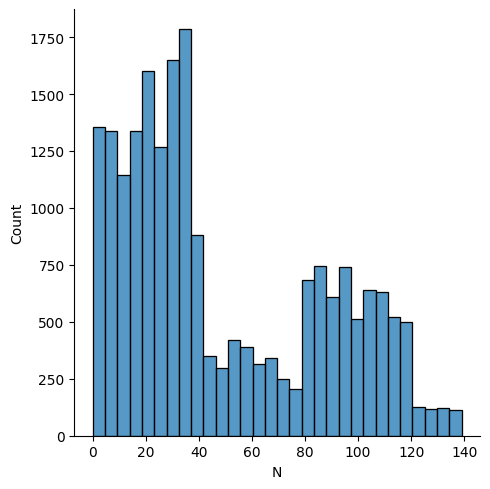

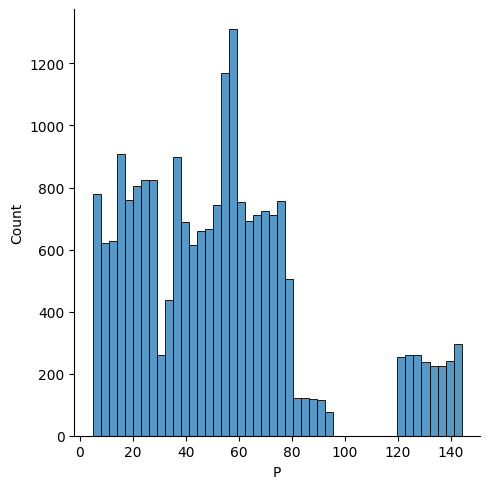

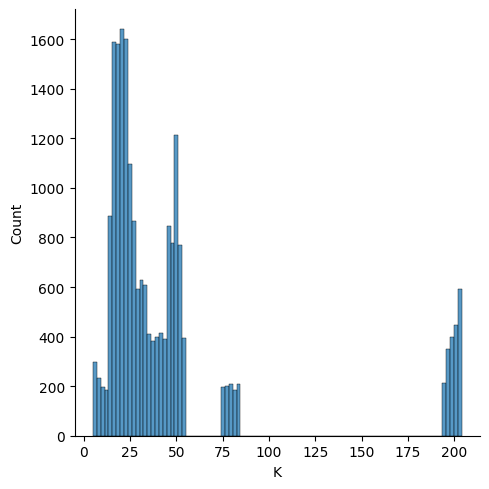

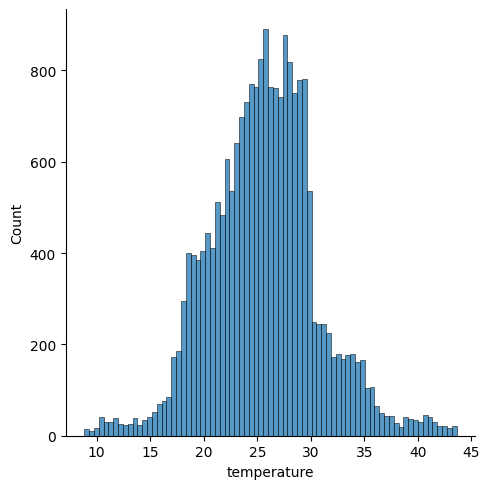

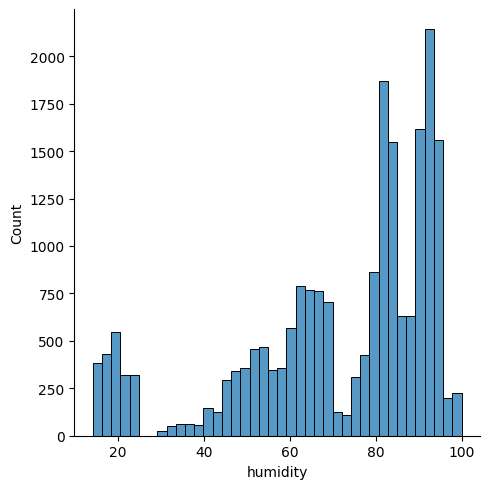

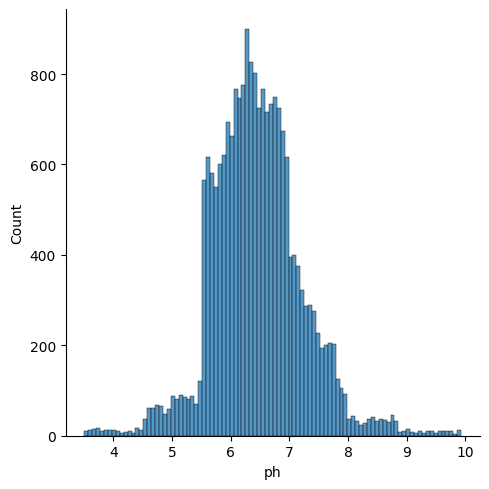

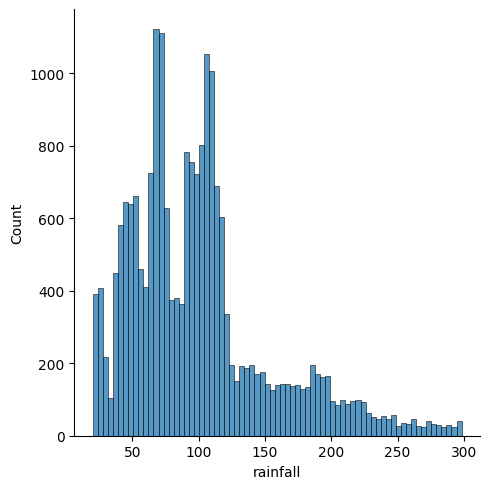

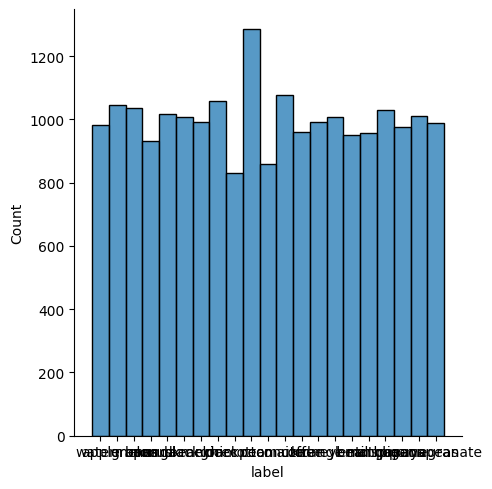

In [13]:
for col in data.columns:
  sns.displot(data[col])

<ipython-input-14-5dbea6ebbd2a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


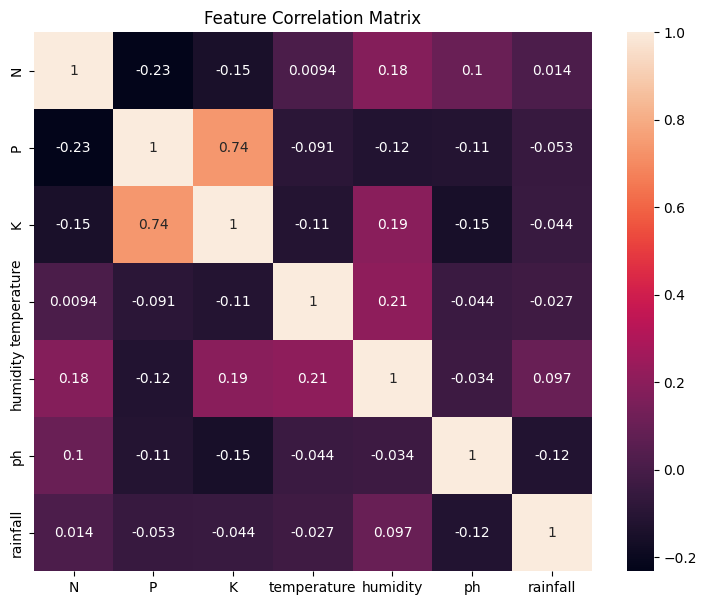

In [14]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [15]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
data.value_counts(normalize=True)

N    P   K   temperature  humidity   ph        rainfall    label    
0    5   6   26.162968    90.311460  7.662145  111.453065  orange       0.000048
63   52  22  25.739977    67.042600  6.357507  92.161643   maize        0.000048
     51  38  22.767212    80.430662  5.376668  226.743763  rice         0.000048
         36  22.559497    83.790697  5.190332  275.712896  rice         0.000048
         19  21.692094    67.841295  5.656367  86.548864   maize        0.000048
                                                                          ...   
24   74  18  33.785280    68.949302  7.272893  72.844182   blackgram    0.000048
     73  17  28.183758    69.000298  7.682502  43.005913   lentil       0.000048
     72  75  17.493415    19.805375  7.474441  77.454415   chickpea     0.000048
         22  18.595091    67.637698  7.813743  49.669979   lentil       0.000048
139  59  19  22.315239    80.536990  7.397090  84.263954   cotton       0.000048
Length: 21000, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
labels = data['label']

In [20]:
dat = ss.fit_transform(data[data.columns[:-1]])

In [21]:
dat = pd.DataFrame(dat)
dat

,0,1,2,3,4,5,6
0,-0.551926,2.253472,2.993021,-0.413327,1.033094,-0.751825,0.002306
1,-0.872147,2.073407,2.877109,-0.528838,1.041862,-1.116156,0.127685
2,-0.685351,2.283483,2.954383,-0.459680,0.925644,-0.698677,0.394687
3,-0.925517,2.463548,2.973702,-0.885103,0.884755,-0.838220,0.101871
4,-1.272424,2.163439,2.935065,-0.747781,0.865034,-0.719601,0.090467
...,...,...,...,...,...,...,...
20995,1.716309,-1.317819,0.037278,0.063229,0.508505,0.292177,-0.842585
20996,1.262662,-1.197776,0.056597,-0.266011,0.800641,0.541344,-0.811128
20997,1.662939,-0.897667,0.114553,-0.176401,0.822016,0.288299,-0.794671
20998,1.476143,-1.107743,-0.001359,0.104229,0.622705,-0.390270,-0.978804


In [22]:
dat.columns = data.columns[:-1]
dat

,N,P,K,temperature,humidity,ph,rainfall
0,-0.551926,2.253472,2.993021,-0.413327,1.033094,-0.751825,0.002306
1,-0.872147,2.073407,2.877109,-0.528838,1.041862,-1.116156,0.127685
2,-0.685351,2.283483,2.954383,-0.459680,0.925644,-0.698677,0.394687
3,-0.925517,2.463548,2.973702,-0.885103,0.884755,-0.838220,0.101871
4,-1.272424,2.163439,2.935065,-0.747781,0.865034,-0.719601,0.090467
...,...,...,...,...,...,...,...
20995,1.716309,-1.317819,0.037278,0.063229,0.508505,0.292177,-0.842585
20996,1.262662,-1.197776,0.056597,-0.266011,0.800641,0.541344,-0.811128
20997,1.662939,-0.897667,0.114553,-0.176401,0.822016,0.288299,-0.794671
20998,1.476143,-1.107743,-0.001359,0.104229,0.622705,-0.390270,-0.978804


In [23]:
dat['label'] = labels
dat

,N,P,K,temperature,humidity,ph,rainfall,label
0,-0.551926,2.253472,2.993021,-0.413327,1.033094,-0.751825,0.002306,apple
1,-0.872147,2.073407,2.877109,-0.528838,1.041862,-1.116156,0.127685,apple
2,-0.685351,2.283483,2.954383,-0.459680,0.925644,-0.698677,0.394687,apple
3,-0.925517,2.463548,2.973702,-0.885103,0.884755,-0.838220,0.101871,apple
4,-1.272424,2.163439,2.935065,-0.747781,0.865034,-0.719601,0.090467,apple
...,...,...,...,...,...,...,...,...
20995,1.716309,-1.317819,0.037278,0.063229,0.508505,0.292177,-0.842585,pomegranate
20996,1.262662,-1.197776,0.056597,-0.266011,0.800641,0.541344,-0.811128,pomegranate
20997,1.662939,-0.897667,0.114553,-0.176401,0.822016,0.288299,-0.794671,pomegranate
20998,1.476143,-1.107743,-0.001359,0.104229,0.622705,-0.390270,-0.978804,pomegranate


In [24]:
data['label'] = labels

In [27]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [28]:
dat.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [37]:
data.to_csv("Unpreprocessed_Data.csv")
dat.to_csv("Preprocessed_Data.csv")

In [32]:
data.shape

(21000, 8)

In [33]:
dat.shape

(21000, 8)

In [34]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,28,128,203,23.489056,94.596369,5.868309,100.277017,apple
1,16,122,197,22.901183,94.794467,5.583839,107.030646,apple
2,23,129,201,23.253150,92.168527,5.909807,121.412917,apple
3,14,135,202,21.088036,91.244632,5.800852,105.640182,apple
4,1,125,200,21.786914,90.799026,5.893470,105.025891,apple
...,...,...,...,...,...,...,...,...
20995,113,9,50,25.914407,82.743246,6.683469,54.766368,pomegranate
20996,96,13,51,24.238795,89.344080,6.878019,56.460799,pomegranate
20997,111,23,54,24.694851,89.827055,6.680441,57.347288,pomegranate
20998,104,16,48,26.123066,85.323593,6.150613,47.428858,pomegranate


In [35]:
dat

,N,P,K,temperature,humidity,ph,rainfall,label
0,-0.551926,2.253472,2.993021,-0.413327,1.033094,-0.751825,0.002306,apple
1,-0.872147,2.073407,2.877109,-0.528838,1.041862,-1.116156,0.127685,apple
2,-0.685351,2.283483,2.954383,-0.459680,0.925644,-0.698677,0.394687,apple
3,-0.925517,2.463548,2.973702,-0.885103,0.884755,-0.838220,0.101871,apple
4,-1.272424,2.163439,2.935065,-0.747781,0.865034,-0.719601,0.090467,apple
...,...,...,...,...,...,...,...,...
20995,1.716309,-1.317819,0.037278,0.063229,0.508505,0.292177,-0.842585,pomegranate
20996,1.262662,-1.197776,0.056597,-0.266011,0.800641,0.541344,-0.811128,pomegranate
20997,1.662939,-0.897667,0.114553,-0.176401,0.822016,0.288299,-0.794671,pomegranate
20998,1.476143,-1.107743,-0.001359,0.104229,0.622705,-0.390270,-0.978804,pomegranate


In [36]:
states.to_csv('States.csv')